## NLP Sentiment classification

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pckl
import seaborn as sns
sns.set_theme()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Extraction et recodage des données

In [5]:
database = pckl.load(open('data_query.p', 'rb'))

In [6]:
database = database.rename(columns={'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target' : 'q1', 'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence': 'q1_confidence', 'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet' : 'q2', 'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence': 'q2_confidence'})

In [8]:
database['q1'].value_counts()

AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).                                                                                                483
FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).                                                                                                      348
NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).                                                                                                                                                                          

In [12]:
database['q1'] = database['q1'].replace({'AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).':'AGAINST', 'FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).':'FOR', 'NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).':'NONE OF THE ABOVE','NEUTRAL: We can infer from the tweet that the tweeter has a neutral stance towards the target. (The tweet being neither favorable nor against the target is not sufficient reason for choosing this option. One reason for choosing this option is that the tweeter supports the target entity to some extent, but is also against it to some extent.)': 'NEUTRAL'})

In [13]:
database['q1'].value_counts()

AGAINST              483
FOR                  348
NONE OF THE ABOVE    317
NEUTRAL               11
Name: q1, dtype: int64

## Exploration

In [14]:
database.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,q1,q1_confidence,q2,q2_confidence,orig_golden,internal_id,orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold,orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,target,tweet,tweet_id
0,713632888,True,golden,30,None,AGAINST,0.6581,2. The tweet does NOT expresses opinion about ...,0.4976,True,189,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,Thank you for another day of life Lord. #Chris...,id588718177095266305
1,713632889,False,golden,2,None,NONE OF THE ABOVE,1.0000,2. The tweet does NOT expresses opinion about ...,0.5294,True,190,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@rosaryrevival Lovely to use Glorious Mysterie...,id592798858725425152
2,713632890,True,golden,26,None,AGAINST,0.8859,1. The tweet explicitly expresses opinion abo...,0.8820,True,207,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@Niall250 good thing is that #DUP have consist...,id593472619208380419
3,713632891,False,golden,3,None,AGAINST,0.6323,1. The tweet explicitly expresses opinion abo...,0.6323,True,211,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,"So, you tell me... is murder okay if the victi...",id592699132399194112
4,713632892,True,golden,31,None,AGAINST,0.8920,1. The tweet explicitly expresses opinion abo...,0.8939,True,213,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@HillaryClinton Don't you mean to say (all chi...,id588527665365188608


In [15]:
database.shape

(1159, 17)

In [16]:
database.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unit_id,1159,NaN,NaN,NaN,7.13633e+08,335.487,7.13633e+08,7.13633e+08,7.13633e+08,7.13634e+08,7.13634e+08
golden,1159,2,False,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_state,1159,2,finalized,1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trusted_judgments,1159,NaN,NaN,NaN,8.96635,4.79184,2,8,8,8,38
last_judgment_at,1090,152,2015-05-04T06:00:00,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q1,1159,4,AGAINST,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q1_confidence,1159,NaN,NaN,NaN,0.78027,0.195433,0.2575,0.6225,0.8143,1,1
q2,1159,3,1. The tweet explicitly expresses opinion abo...,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2_confidence,1159,NaN,NaN,NaN,0.721863,0.195343,0.3732,0.51715,0.7407,0.88275,1
orig_golden,69,1,True,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
database.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at', 'q1', 'q1_confidence', 'q2', 'q2_confidence',
       'orig_golden', 'internal_id',
       'orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold',
       'orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet',
       'target', 'tweet', 'tweet_id'],
      dtype='object')

#### Sujets des tweets 

In [18]:
#Targets
print(database['target'].unique())

['Legalization of Abortion' 'Hillary Clinton' 'Feminist Movement'
 'Atheism']


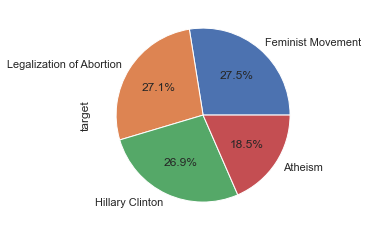

In [25]:
pd.Series(database['target']).value_counts().plot.pie(autopct="%.1f%%")
plt.show()

#### q1

In [20]:
#Answers to Q1
print(database['q1'].unique())
print(database['q1_confidence'].describe())

['AGAINST' 'NONE OF THE ABOVE' 'FOR' 'NEUTRAL']
count    1159.000000
mean        0.780270
std         0.195433
min         0.257500
25%         0.622500
50%         0.814300
75%         1.000000
max         1.000000
Name: q1_confidence, dtype: float64


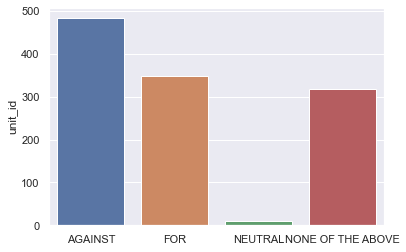

In [22]:
sns.barplot(y=database.groupby(by='q1').count().transpose().iloc[0,:], x=['AGAINST', 'FOR', 'NEUTRAL', 'NONE OF THE ABOVE'])

#### q2

In [24]:
#Answers to Q2
print(database['q2'].unique())
print(database['q2_confidence'].describe())

['2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.'
 '1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.'
 '3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)']
count    1159.000000
mean        0.721863
std         0.195343
min         0.373200
25%         0.517150
50%         0.740700
75%         0.882750
max         1.000000
Name: q2_confidence, dtype: float64


In [11]:
print(database['orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target'].unique())

[None]


#### Tweets

In [117]:
# Faire un nuage de mot 
# Analyser les langues des tweets 
text = str(database['tweet'].values)

def plot_word_cloud(text) :
    # Définir le calque du nuage des mots
    wc = WordCloud(width=600,height=600,background_color="white", max_words=200, stopwords=stop_words, mask = mask_coloring, max_font_size=90,collocations = False, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (15,20))
    wc.generate(text)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.show()


plot_word_cloud(text)

NameError: name 'stop_words' is not defined

#### Valeurs manquantes 

In [26]:
database.isna().sum()

unit_id                                                                                                                                                 0
golden                                                                                                                                                  0
unit_state                                                                                                                                              0
trusted_judgments                                                                                                                                       0
last_judgment_at                                                                                                                                       69
q1                                                                                                                                                      0
q1_confidence                                                               

In [89]:
database['orig_golden'].unique()

array([True, None], dtype=object)

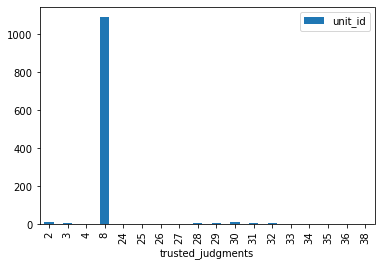

In [64]:
database[['unit_id', 'trusted_judgments']].groupby(by='trusted_judgments').count().plot.bar(y='unit_id')
plt.show()

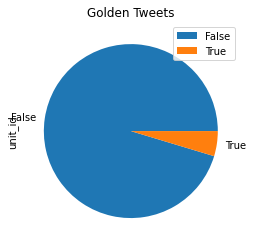

In [72]:
database.groupby(by='golden').count().plot.pie(y='unit_id', label='unit_id')
plt.title('Golden Tweets')
plt.show()

# Word 2 Vec

In [31]:
import nltk
from tqdm import tqdm
from gensim.models import Word2Vec
from multiprocessing import cpu_count
from gensim.models.phrases import Phrases, Phraser
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Clean text 

In [71]:
#Suppression des hashtags
def remove_hashtags(tokens):
    tokens = map(lambda x: x.replace('#', ''), tokens)
    return list(tokens)

#Suppression des url
def remove_url(tokens):
    tokens = filter(lambda x: "http" not in x, tokens)
    return list(tokens)

def remove_html(tokens):
    tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
    return list(tokens)


def tokenize_url_hashtags(corpus, tweets=False):
    if tweets:
        tokenizer = TweetTokenizer()
    else:
        tokenizer = TreebankWordTokenizer()  
    # Life hack : treebank word tokenizer won't keep html code in one token.
    # To preprocess economics news corpus, use tweettokenizer. 
    tokenized_sentences = []
    for sample in tqdm(corpus):
    # separating sentences
        for sentence in sent_detector.tokenize(sample):
            tokens = tokenizer.tokenize(sentence)
            tokens = remove_url(tokens)
            tokens = remove_html(tokens)
            tokens = remove_hashtags(tokens)
            tokens = list(map(lambda x: x.lower(), tokens))
            tokenized_sentences.append(tokens)
    return tokenized_sentences


def clean_corpus(corpus, threshold=50, tweets=False):
    tokenized_sentences = tokenize_url_hashtags(corpus, tweets=tweets)
    phrases = Phrases(tokenized_sentences, threshold=threshold)

  # This lets you use it with less RAM and faster processing.
  # But it will no longer be possible to update the detector with new training 
  # samples
    phraser = Phraser(phrases)

  # Merging multi-word expressions in the tokenization
    clean_corpus = []
    for sentence in tokenized_sentences:
        clean_corpus.append(phraser[sentence])
    return clean_corpus

from gensim.models.phrases import Phrases, Phraser

def show_phrases(tokenized_sentences, threshold=10, shown=15):
  # Training the multi-word expression detector
  phrases = Phrases(tokenized_sentences, threshold=threshold)
  i = 0
  for phrase, score in phrases.export_phrases(tokenized_sentences):
    if i>shown:
      break
    else:
      print("Expression : {0}, score = {1}".format(phrase, score))
    i=i+1

In [72]:
cleaned_pol = tokenize_url_hashtags(database.tweet.array, tweets=True)
print('number of pol:', len(cleaned_pol))

100%|██████████| 1159/1159 [00:00<00:00, 2381.55it/s]

number of pol: 2134


In [82]:
print(cleaned_pol[106]) #Pb : Hillary Clinton devrait être ensemble

["it's", 'time', 'that', 'we', 'move', 'from', 'good', 'words', '2', 'good', 'works', ',', 'from', 'sound', 'bites', '2', 'sound', 'solutions', 'hillary', 'clinton', 'hillaryclinton']


In [74]:
show_phrases(cleaned_pol, threshold=10)

Expression : b'the same', score = 19.115553388590932
Expression : b'pray for', score = 25.343244990303816
Expression : b'to kill', score = 13.87004716981132
Expression : b'i am', score = 49.5795719844358
Expression : b'want to', score = 11.643990216631726
Expression : b'i am', score = 49.5795719844358
Expression : b'no matter', score = 60.878881987577635
Expression : b'people who', score = 39.89755766621438
Expression : b'have been', score = 10.677015250544661
Expression : b'ready for', score = 44.926661573720395
Expression : b'marcorubio in', score = 36.85764168681171
Expression : b'a woman', score = 18.289482612383374
Expression : b'hillary clinton', score = 122.86780626780627
Expression : b'too many', score = 75.39615384615385
Expression : b'too many', score = 75.39615384615385
Expression : b'the same', score = 19.115553388590932


#### Training Word2Vec model 

In [83]:
cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

The virtual instance has 8 cpus, that will be used to train the word2vec model


In [84]:
# We will just get the "WordVectors" parameter from the trained Word2Vec model.
# Otherwise, we could continue training with some more exemples that could be
# fed on the fly to the model.
print("Training the political W2V ...")
pol = Word2Vec(cleaned_pol, size=100, window=5, min_count=1, workers=cpu, sg=0)
pol.train(cleaned_pol, total_examples=len(cleaned_pol), epochs=100)
pol_wv = pol.wv

Training the political W2V ...


In [85]:
def tokens2vectors(tokenCorpus, trained_word2vec, dim=100):
    new_sample = list()
    for sample in tokenCorpus:
        tweetVecs = list()
        for token in sample.split(' '):
            try: tweetVecs.append(trained_word2vec.get_vector(token)  )
            except: tweetVecs.append( np.zeros(dim) ) 
        new_sample.append(np.mean(tweetVecs, axis=0))
    return np.array(new_sample)

In [86]:
X = tokens2vectors(database.loc[:, "tweet"], pol_wv)
print(X.shape)
print(len(database.loc[:, "tweet"]))

(1159, 100)
1159


# Cos similarity 

In [90]:
from sklearn.metrics.pairwise import cosine_similarity 

Après avoir vectorisé les mots, nous allons calculer la similarité de ceux-ci afin d'analyser la cohérence. 

## Trying Kmeans on the data
On tente un kmeans sur les données pour voir si elles sont regroupées en Against / For / Neutral / None Of the Above

In [94]:
from sklearn.cluster import KMeans
# this example uses only 3 initializations to be fast (but less effective!)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20, max_iter=300, verbose=0).fit(X)

In [95]:
#Prédiction des clusters
from sklearn.cluster import KMeans
# use the model to predict clusters
clusters = kmeans.predict(X)

In [96]:
len(clusters)

1159

In [97]:
X.shape

(1159, 100)

In [98]:
# display some cluster related info
from collections import Counter 
print('Here is the occurrence counts for each cluster:')
for k,v in dict(Counter(clusters)).items(): print('cluster', k, 'has', v, 'elements')

Here is the occurrence counts for each cluster:
cluster 2 has 269 elements
cluster 0 has 383 elements
cluster 1 has 342 elements
cluster 3 has 165 elements


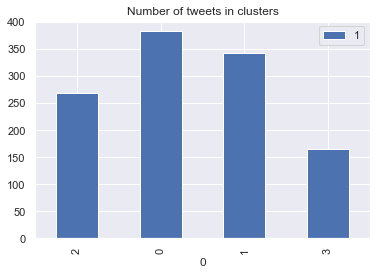

In [99]:
pd.DataFrame.from_dict(dict(Counter(clusters)).items()).plot.bar(y=1, x=0, title='Number of tweets in clusters')
plt.show()

In [101]:
clusterTendancies = {'FOR':list(), 
                     'NONE OF THE ABOVE': list(),
                     'AGAINST': list(), 
                     'NEUTRAL':list()}
for text, sentiment, cluster in list(zip(database.loc[:, "tweet"], 
                                         database.loc[:, 'q1'],
                                         clusters)):
    clusterTendancies[sentiment].append(cluster)
clusterTendancies = { k:Counter(v) for k,v in clusterTendancies.items() }
print('clusters distribution accross sentiments')
print(clusterTendancies)

print(database.loc[:, "tweet"].shape, 'hey', clusters.shape)

clusters distribution accross sentiments
{'FOR': Counter({1: 117, 0: 93, 2: 74, 3: 64}), 'NONE OF THE ABOVE': Counter({0: 124, 1: 84, 2: 66, 3: 43}), 'AGAINST': Counter({0: 160, 1: 138, 2: 128, 3: 57}), 'NEUTRAL': Counter({0: 6, 1: 3, 2: 1, 3: 1})}
(1159,) hey (1159,)


In [102]:
# Quantitative evaluation
from sklearn.metrics.cluster import v_measure_score
label2id = {'FOR':0, 
            'NONE OF THE ABOVE': 0,
            'AGAINST': 0, 
            'NEUTRAL':0}
y_true = np.array([ label2id[sentiment] for sentiment in database.loc[:, "q1"] ])
print('v_measure score:', v_measure_score(y_true, clusters))

v_measure score: 0.0


# Aspect-Based Sentiment Analysis